In [1]:
# --- Setup and Imports ---
import os
import sys
import pandas as pd
from IPython.display import Image, display

# Ensure the parent directory is in the path to import project modules (src/)
if 'src' not in sys.path:
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

Dependencies imported successfully.
Building Graph...


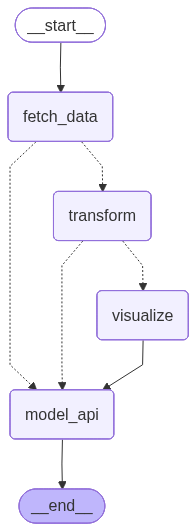

Graph visualization generated successfully.


In [2]:
# Import graph components and the LLM client
from src.memory.state import FinanceState
from src.graph.graph_defination import create_finance_graph

print("Dependencies imported successfully.")
print("Building Graph...")

# Compile the graph
graph = create_finance_graph()

# --- Build & Visualize Graph (Mermaid PNG) ---
try:
    # Use the compiled graph's visualization method
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("Graph visualization generated successfully.")
except Exception as e:
    print("Graph rendering failed:", e)
    print("Note: Install 'graphviz' and 'pydot' if you want visual output.")

In [3]:
# --- Run Pipeline for BTC, ETH, SOL (Default: 7 days) ---
assets = ["bitcoin", "ethereum", "solana"]
final_states = {}

for a in assets:
    print(f"\nRunning Pipeline for: {a.upper()}...")

    # Initialize the FinanceState object with required fields
    init = FinanceState(
        query=f"Analyze the performance and volatility score for {a} over 7 days.",
        asset=a,
        days=7,
        raw_data=None,
        cleaned_data=None,
        volatility_score=0.0,
        memory_log=[],
        llm_summary="",
        comparison_plot=None
    )

    # Invoke the graph with the initial state
    final_states[a] = graph.invoke(init)
    print(f"Done for {a.upper()}.")

print("\nAll asset pipelines completed.")


Running Pipeline for: BITCOIN...

--- Node: 1/4 - FETCH_DATA (Real API) ---
-> Asset Detected: BTC
-> Status: Fetching data for BTC...
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/btc-bitcoin/historical (start=2025-11-13)

--- ROUTER 1 (Data Check): Asset=btc, VisualFlag=False ---

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['btc']

--- ROUTER 2 (Visualization): Asset=btc, VisualFlag=False ---

--- Node 4/4 – MODEL ---
Done for BITCOIN.

Running Pipeline for: ETHEREUM...

--- Node: 1/4 - FETCH_DATA (Real API) ---
-> Asset Detected: ETH
-> Status: Fetching data for ETH...
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/eth-ethereum/historical (start=2025-11-13)

--- ROUTER 1 (Data Check): Asset=eth, VisualFlag=False ---

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['eth']

--- ROUTER 2 (Visualization): Asset=eth, VisualFlag=False ---

--- Node 4/4 – MODEL ---
Done for ETHEREUM.

Running 

In [3]:
def run_workflow(query: str, system_instruction: False):
    """
    Clean public entry point so the notebook can call run_workflow("my query").
    """
    return graph.invoke({"query": query})


In [4]:

p1 = "Explain cryptocurrency volatility in simple terms."
final_state = run_workflow(p1, False)

print(final_state["final_answer"])



--- Node: 1/4 - FETCH_DATA ---
-> Result: No specific asset. Routing to Simple Query.

--- Node: 4/4 - MODEL ---
-> Simple Query Mode
## Simple Query Answer
**Query:** Explain cryptocurrency volatility in simple terms.

That's a great question. I can explain cryptocurrency volatility in simple terms.

### What is Volatility?

In simple financial terms, **volatility** is a measure of how much and how quickly an asset's price changes over a period of time.

*   **High Volatility** means the price is swinging wildly—it can shoot up to a new high one day and crash to a new low the next. This is what cryptocurrencies are known for.
*   **Low Volatility** means the price is relatively stable and moves up or down slowly.

### Why is Cryptocurrency So Volatile?

Cryptocurrencies are much more volatile than traditional assets like stocks or gold for a few key reasons:

1.  **The Market is Young and Immature (Price Discovery):**
    *   The crypto market is still relatively new compared to the 

In [19]:
p3 = "Describe the typical phases of a cryptocurrency market cycle."
system_prompt_grounded = "You are a finance academic. Provide a clear, structured, and technically accurate explanation."
r3 = run_workflow(p3, False)

print("Prompt 3 Output:")
print(r3['final_answer'])


--- Node: 1/4 - FETCH_DATA ---
-> Result: No specific asset. Routing to Simple Query.

--- Node: 4/4 - MODEL ---
-> Simple Query Mode
Prompt 3 Output:
## Simple Query Answer
**Query:** Describe the typical phases of a cryptocurrency market cycle.

The typical cryptocurrency market cycle is a recurring pattern of price movement and investor sentiment, generally divided into four main phases:

### 1. Accumulation Phase
This phase occurs after a major market downturn, when prices have bottomed out and stabilized at a low level.

*   **Price Action:** Prices trade within a relatively tight range, with no clear upward or downward trend.
*   **Sentiment:** Sentiment is generally low, pessimistic, or uncertain, as public interest is minimal.
*   **Investor Behavior:** Savvy, long-term investors and "smart money" quietly begin to buy and "accumulate" assets, anticipating future growth. This phase is often considered the best risk-reward entry point for long-term holders.

### 2. Markup Phase 


--- Node: 1/4 - FETCH_DATA ---
-> Asset Detected: COMPARE
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/btc-bitcoin/historical (start=2025-11-13)
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/eth-ethereum/historical (start=2025-11-13)

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['btc', 'eth']

--- Node: 3/4 - VISUALIZE ---
-> Chart generated and encoded.

--- Node: 4/4 - MODEL ---
-> Comparison Mode

Prompt 4 Output:


## BTC vs ETH Analysis

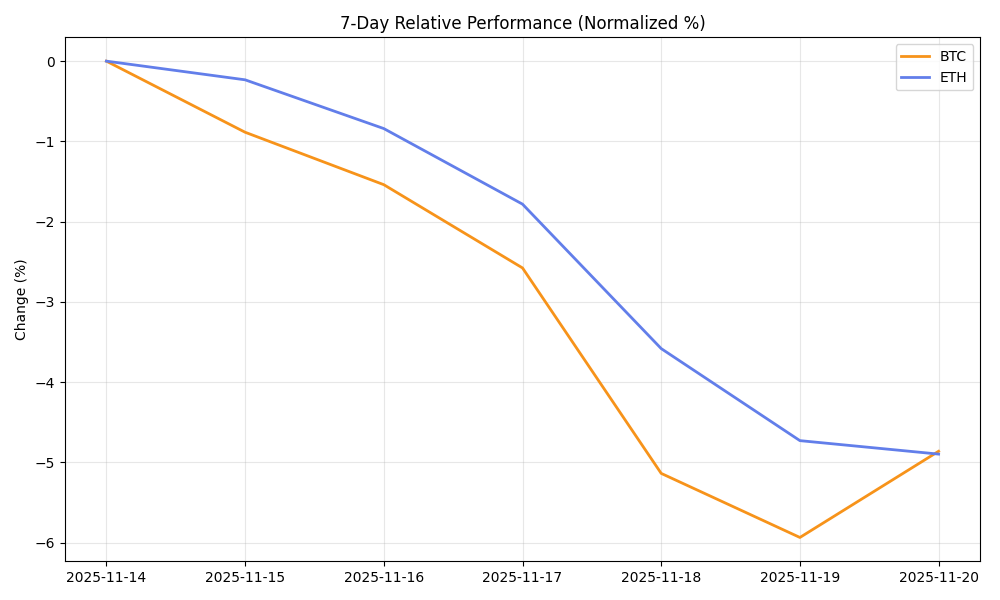

### Analyst Summary
This comparison analyzes Bitcoin (BTC) and Ethereum (ETH) strictly from an economic perspective, focusing on their monetary policies, utility functions, security models, and resulting valuation frameworks.

The provided volatility data (BTC Vol: 2.22% vs. ETH Vol: 1.98%) suggests that while both assets are highly volatile and correlated, Ethereum has recently exhibited marginally lower volatility. This difference can be partially explained by their divergent economic roles, as detailed below.

---

## Economic Comparison: Bitcoin vs. Ethereum

The fundamental economic difference is that **Bitcoin is designed as a scarce, non-sovereign Store of Value (SoV)**, while **Ethereum is designed as a productive asset and a platform for decentralized economic activity.**

### 1. Monetary Policy and Supply Economics

| Feature | Bitcoin (BTC) | Ethereum (ETH) |
| :--- | :--- | :--- |
| **Supply Cap** | Hard Capped (21 million coins). | No Cap. Supply is dynamic (Issuance vs. Burning). |
| **Issuance Mechanism** | Halving (approximately every four years), reducing block subsidy by 50%. | Proof-of-Stake (PoS) issuance is minimal, tied to the amount of ETH staked. |
| **Inflation/Deflation** | **Disinflationary.** Issuance rate approaches zero. Highly predictable. | **Potentially Deflationary (Ultra-Sound Money).** EIP-1559 burns the base transaction fee. If network usage is high, burned ETH exceeds newly issued ETH. |
| **Economic Scarcity** | Absolute scarcity (fixed supply). | Relative scarcity (supply reduction via burning). |

#### BTC Economic Policy Summary
Bitcoin’s economic policy is its most defining feature: **predictable scarcity.** The fixed supply cap and the halving mechanism ensure that its supply schedule is transparent and immutable. This makes BTC an effective hedge against fiat currency inflation and monetary expansion, driving its valuation primarily as a macro-economic asset class (Digital Gold).

#### ETH Economic Policy Summary
Ethereum’s policy is focused on **economic efficiency and sustainability.** The shift to Proof-of-Stake (PoS) drastically reduced issuance, and EIP-1559 introduced a fee-burning mechanism. This means ETH’s supply is tied directly to network demand. High demand leads to more burned ETH, potentially making the asset deflationary. This structure aligns the economic interests of users (who pay fees) and holders (who benefit from supply reduction).

### 2. Utility, Demand Drivers, and Economic Rent

The source of demand for each asset dictates its economic value proposition.

#### Bitcoin: The Settlement Layer
*   **Primary Utility:** Censorship-resistant, permissionless, final settlement layer.
*   **Demand Drivers:**
    1.  **Macro Hedge:** Demand is driven by global monetary policy, inflation fears, and institutional adoption as a reserve asset.
    2.  **Security Premium:** Demand for the most secure and decentralized network for large-value transfers.
*   **Economic Rent:** BTC holders earn no direct yield (unless they lend it out). The economic rent is captured through the appreciation of the asset due to its scarcity and adoption as a Store of Value.

#### Ethereum: The Global Computer
*   **Primary Utility:** The base layer for decentralized applications (DApps), DeFi, NFTs, and Web3 infrastructure. It is the commodity (fuel) required to run the decentralized economy.
*   **Demand Drivers:**
    1.  **Gas Demand:** Demand is driven by the usage of the network (transactions, smart contract execution, token swaps). Users must acquire ETH to pay for "gas."
    2.  **Staking Yield:** Validators must stake ETH to secure the network, earning a yield (currently 3-5% APY). This creates a demand sink for ETH.
*   **Economic Rent:** ETH is a **productive asset.** Holders can earn yield by staking, and the asset generates "cash flow" (transaction fees) that is either burned (benefiting all holders via supply reduction) or paid to validators.

### 3. Economic Security Model

The cost to attack the network is a critical economic metric, ensuring the integrity of the ledger.

| Feature | Bitcoin (BTC) | Ethereum (ETH) |
| :--- | :--- | :--- |
| **Mechanism** | Proof-of-Work (PoW) | Proof-of-Stake (PoS) |
| **Cost of Attack** | **Energy Expenditure.** The attacker must acquire and deploy massive amounts of specialized hardware (ASICs) and pay ongoing electricity costs to control 51% of the hash rate. | **Economic Collateral.** The attacker must acquire and stake 51% of all staked ETH. If they attempt a malicious action, their entire stake is "slashed" (destroyed). |
| **Economic Incentive** | Miners are incentivized by block rewards and transaction fees. | Validators are incentivized by staking yield and priority fees. |

From an economic risk perspective, PoS shifts the security cost from ongoing energy consumption (PoW) to the **opportunity cost and capital risk** of staking the underlying asset. The slashing mechanism provides a direct, quantifiable economic penalty for malicious behavior, making a 51% attack extremely expensive and self-destructive for the attacker.

### 4. Valuation Frameworks

As a quantitative analyst, the difference in utility necessitates different valuation approaches for BTC and ETH.

#### Valuing Bitcoin (SoV Asset)
BTC is typically valued using macro-economic models:
1.  **Stock-to-Flow (S2F):** Measures scarcity by comparing the existing supply (stock) to the annual production (flow). While controversial, it highlights the scarcity premium.
2.  **Monetary Premium Model:** Compares BTC’s market capitalization to the market cap of other SoV assets (e.g., gold, real estate, fiat reserves).
3.  **Network Effects:** Valuation is often tied to Metcalfe’s Law (value proportional to the square of the number of users), focusing on adoption and security.

#### Valuing Ethereum (Productive Asset)
ETH is increasingly valued using traditional financial models adapted for decentralized finance:
1.  **Discounted Cash Flow (DCF) / P/E Ratio:** Since ETH generates "cash flow" (fees) and pays yield (staking rewards), analysts can model future network fee revenue and discount it back to present value.
2.  **Velocity Model:** Analyzes the speed at which ETH changes hands. A lower velocity (more ETH staked or locked in DeFi) suggests higher demand for holding the asset, increasing its value.
3.  **Cost of Security:** Valuation can be anchored by the economic cost required to secure the network (the value of staked ETH).

### Conclusion

| Economic Metric | Bitcoin (BTC) | Ethereum (ETH) |
| :--- | :--- | :--- |
| **Core Economic Role** | Digital Gold / Store of Value (SoV) | Decentralized Infrastructure / Productive Asset |
| **Supply Status** | Hard Capped (21M) | Dynamic (Potentially Deflationary) |
| **Primary Demand** | Macro-economic uncertainty, institutional reserve | Network usage (Gas), Staking yield |
| **Valuation Focus** | Scarcity, Macro-economic adoption, S2F | Cash flow (Fees), Yield, DCF models |

In summary, Bitcoin’s economic value is derived from its **immutability and scarcity**, positioning it as a non-sovereign monetary base layer. Ethereum’s economic value is derived from its **utility and productivity**, positioning it as the essential commodity (fuel) for the growing decentralized digital economy.

In [5]:
from IPython.display import display, Markdown

p4 = "compare differences between Bitcoin and Ethereum from an economic perspective?"
system_prompt_grounded = "You are a finance academic. Provide a rigorous, structured explanation with subsections."

# Execute the workflow
r4 = run_workflow(p4, system_prompt_grounded)

print("\n" + "="*40)
print("Prompt 4 Output:")
print("="*40)

# Check for output and display formatted Markdown
if r4.get('llm_output'):
    display(Markdown(r4['llm_output']))
else:
    print("No output generated.")

if r4.get('error'):
    print(f"\nError Trace: {r4['error']}")

In [6]:
p6 = "What are the most significant risks investors face in crypto in buying btc?"
system_prompt_grounded = "You are a finance academic. Provide a structured analysis with bullet points."
r6 = run_workflow(p6, system_prompt_grounded)

print("Prompt 6 Output:\n")

print(r6['final_answer'])


--- Node: 1/4 - FETCH_DATA ---
-> Asset Detected: BTC
   -> HTTP GET: https://api.coinpaprika.com/v1/tickers/btc-bitcoin/historical (start=2025-11-13)

--- Node: 2/4 - TRANSFORM_NODE (Calculating Statistics) ---
-> Stats Calculated for: ['btc']

--- Node: 4/4 - MODEL ---
-> Single Asset Mode: btc
Prompt 6 Output:

## BTC Analysis

### Stats
| Metric | Value |
|---|---|
| Avg | $93866.13 |
| Volatility | 2.22% |

### Report
This analysis addresses the most significant risks associated with investing in Bitcoin (BTC), integrating the provided data metrics into the assessment of market risk.

***

## Financial Analyst Report: Bitcoin Investment Risk Analysis

The provided data indicates a high average price point ($\$93,866.13$) and a volatility metric of **2.22%**. While 2.22% may appear moderate compared to historical BTC peaks, it represents substantial daily dollar movement at this valuation, confirming that BTC remains a high-risk asset class.

The risks facing BTC investors can be 